In [ ]:
!pip3 install wordcloud
!pip3 install seaborn
!pip3 install statsmodels

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from wordcloud import WordCloud
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
def clean_dublicate_date(df):
    df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'geoName'], axis=1)
    df = df.groupby(['date', 'state', 'new_case']).sum()
    df = df.reset_index()
    return df

In [3]:
df = pd.read_csv('final_mvp_usa_df.csv')
df = clean_dublicate_date(df)
df

,date,state,new_case,Covid,Covid19,Covid-19,Coronavirus,quarantine,isolation,Outbreak,...,casual contact,close contact,direct contact,mild cold symptoms,mild cold,flu-like symptoms,flu-like,pandemic,epidemic,epidemy
0,2020-01-22,Alabama,0,0.0,0.0,0.0,98.0,2.0,20.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
1,2020-01-22,Alaska,0,0.0,0.0,0.0,100.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-22,Arizona,0,0.0,0.0,0.0,99.0,1.0,33.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
3,2020-01-22,Arkansas,0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-22,California,0,0.0,0.0,0.0,99.0,1.0,15.0,77.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,33.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22996,2021-04-16,Virginia,1608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22997,2021-04-16,Washington,2169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22998,2021-04-16,West Virginia,475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22999,2021-04-16,Wisconsin,903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [509]:
def plotly_map_view(df, date, name):
    df_d=df[df.date==date]
    df_d = df_d[df_d.state.duplicated()==False]

    df_usa_code = pd.read_csv('usa_code.csv')
    df_d = df_d.merge(df_usa_code[['ansi_code', 'label']], left_on='state', right_on='label', how='left')
    df_d = df_d[[name, 'ansi_code']]
    return px.choropleth(locations=df_d.ansi_code, locationmode="USA-states", color=df_d[name], range_color=(0, 100), scope="usa")

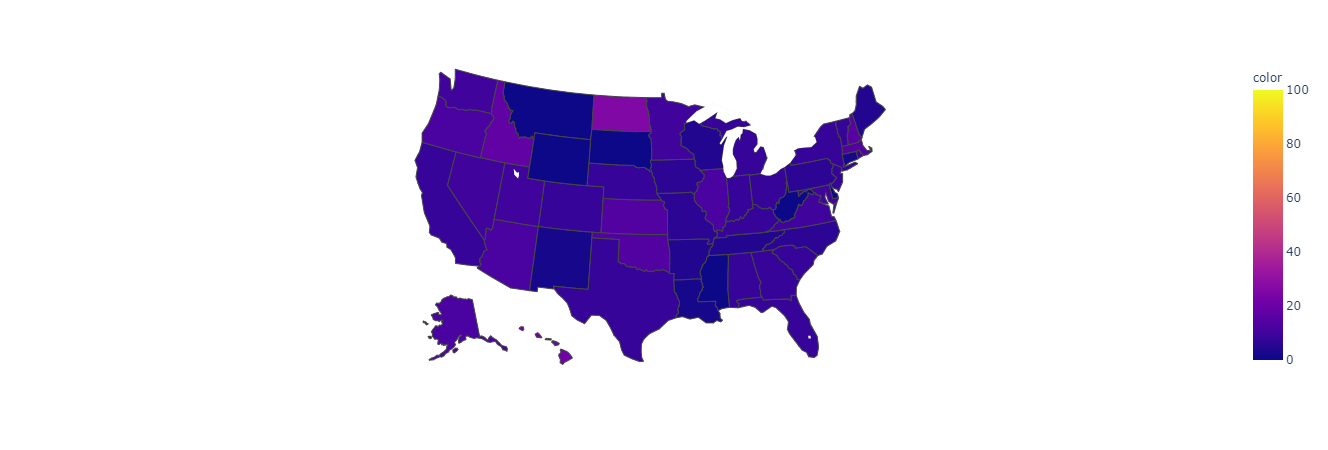

In [510]:
fig = plotly_map_view(df, '2020-03-01', 'Covid')
fig.show()

In [511]:
df[df.columns[3:]].sum().sort_values(ascending=False)

pandemic                1796427.0
Fever                   1581084.0
Covid                   1340087.0
Cough                   1273444.0
sneezing                1026819.0
Shortness of breath      954962.0
Coronavirus              861945.0
Outbreak                 820605.0
Sore throat              790769.0
isolation                500566.0
Fatigue                  374030.0
high temperature         266656.0
body aches               240893.0
epidemic                 234304.0
chills                   156797.0
close contact            152012.0
direct contact           102596.0
Covid-19                  96393.0
can't smell               67294.0
can't taste               63058.0
loss of taste             55693.0
loss of smell             49396.0
muscle aches              48780.0
quarantine                42818.0
can't breath              26535.0
difficulty breathing      26218.0
Covid19                   14957.0
epidemy                    7881.0
cannot taste               3626.0
cannot smell  

In [514]:
wordcloud = WordCloud(background_color='black', colormap='Greens', collocations=False).fit_words(df[df.columns[3:]].sum().sort_values(ascending=False))

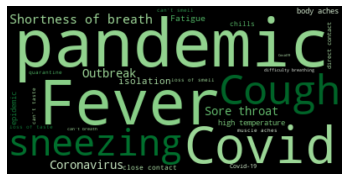

In [515]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [516]:
df_t=df[df.state=='Alabama'].sort_values('date')

In [517]:
df_t

,date,state,new_case,Covid,Covid19,Covid-19,Coronavirus,quarantine,isolation,Outbreak,...,casual contact,close contact,direct contact,mild cold symptoms,mild cold,flu-like symptoms,flu-like,pandemic,epidemic,epidemy
0,2020-01-22,Alabama,0,0.0,0.0,0.0,98.0,2.0,20.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
51,2020-01-23,Alabama,0,0.0,0.0,0.0,97.0,3.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,2020-01-24,Alabama,0,0.0,0.0,0.0,97.0,3.0,0.0,100.0,...,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
153,2020-01-25,Alabama,0,0.0,0.0,0.0,199.0,1.0,33.0,167.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,83.0,0.0
204,2020-01-26,Alabama,0,0.0,0.0,0.0,100.0,0.0,0.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,33.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22746,2021-04-12,Alabama,172,87.0,0.0,8.0,4.0,1.0,100.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,33.0,0.0
22797,2021-04-13,Alabama,282,81.0,0.0,8.0,10.0,1.0,50.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
22848,2021-04-14,Alabama,277,81.0,0.0,4.0,14.0,1.0,0.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
22899,2021-04-15,Alabama,421,74.0,0.0,6.0,18.0,2.0,0.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0


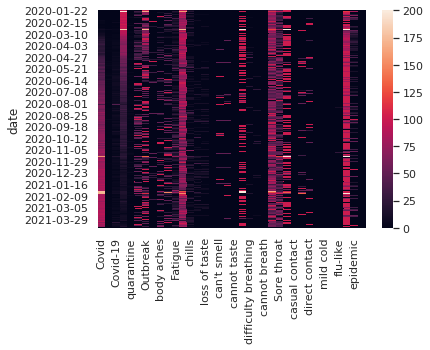

In [195]:
df_t = df_t.set_index('date')
df_t = df_t[df_t.columns[2:]]
ax = sns.heatmap(df_t)


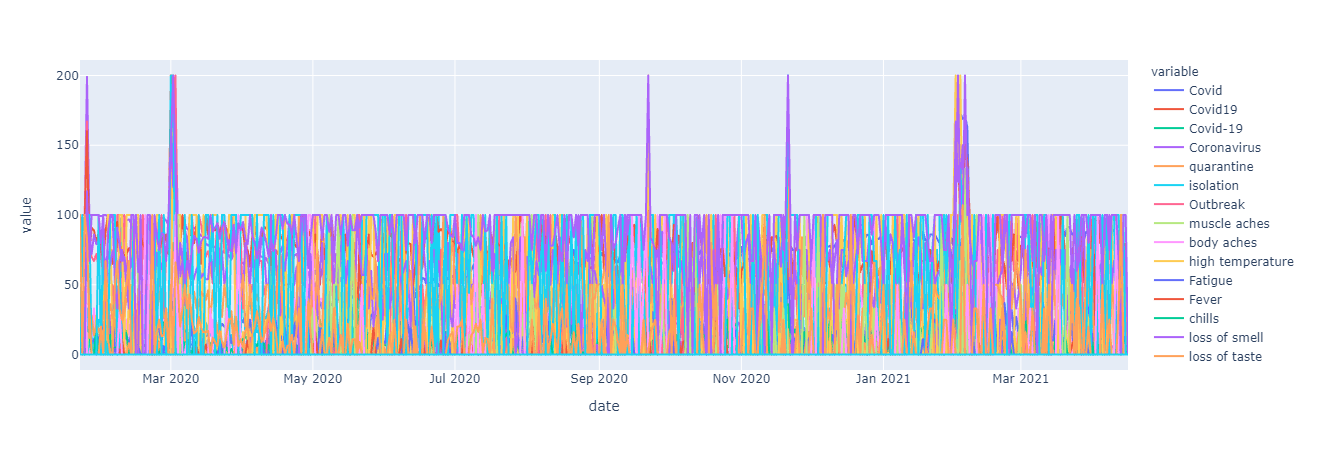

In [203]:
px.line(df_t)

In [245]:
decomposition = seasonal_decompose(df_t.Covid, period=14) 

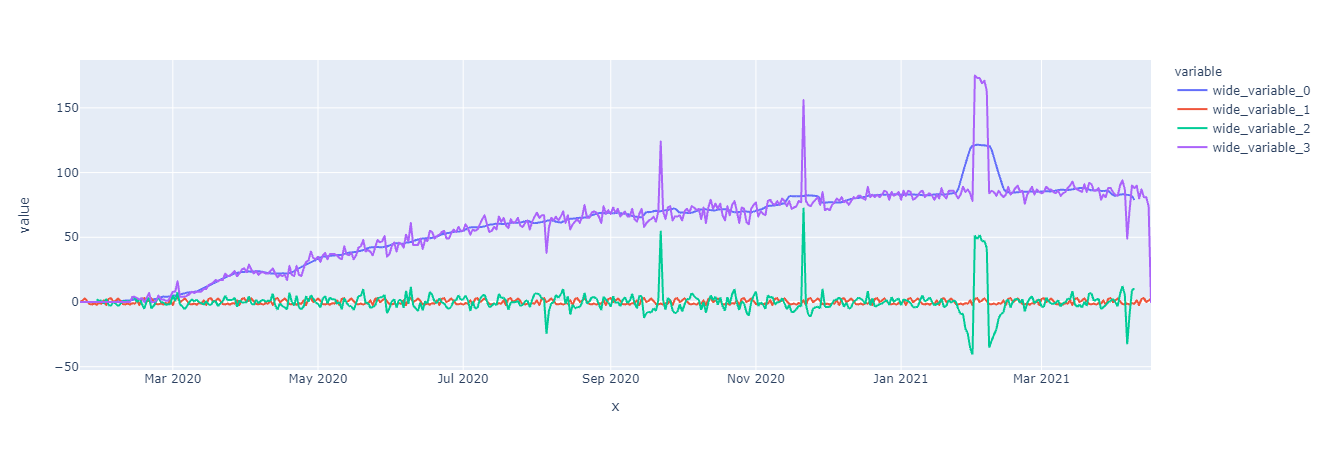

In [251]:
px.line(x=df_t.date, y=[decomposition.trend, decomposition.seasonal, decomposition.resid, df_t.Covid])

In [284]:
import warnings
from statsmodels.tsa.ar_model import AutoReg

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    window_size = 30
    ar_list = list(df.Mean[:window_size])
    for pred_idx in range(window_size, len(df_t.Covid)):

        current_window = list(df_t.Covid[pred_idx - window_size:pred_idx])
        model = AutoReg(current_window, [1, 2]).fit()
        current_predict = model.predict(30, 30)[0]
        ar_list.append(current_predict)

In [285]:
ar_list_filtered = np.where(np.array(ar_list) > 1e5, 0, np.array(ar_list))

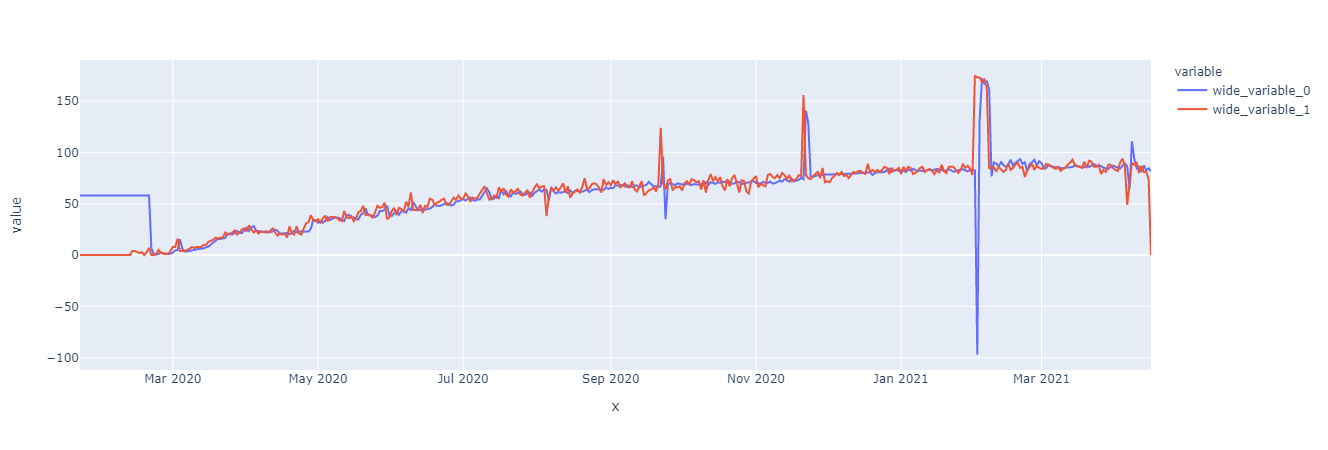

In [286]:
px.line(x=df_t.date, y=[ar_list, df_t.Covid])

In [292]:
import statsmodels.api as sm

exog = df_t['new_case']
mod = sm.tsa.VARMAX(df_t[['Covid', 'Coronavirus']], order=(2,0), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

/home/solo/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                              Statespace Model Results                              
Dep. Variable:     ['Covid', 'Coronavirus']   No. Observations:                  451
Model:                              VARX(2)   Log Likelihood               -3456.856
Date:                      Mon, 31 May 2021   AIC                           6939.713
Time:                              17:05:45   BIC                           6993.162
Sample:                                   0   HQIC                          6960.777
                                      - 451                                         
Covariance Type:                        opg                                         
Ljung-Box (L1) (Q):            24.87, 0.61   Jarque-Bera (JB):   16262.07, 63481.03
Prob(Q):                        0.00, 0.43   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):        12.33, 0.07   Skew:                      -0.01, 2.59
Prob(H) (two-sided):            0.00, 0.00   Kurtosis:              

In [296]:
test_df[['Covid', 'Coronavirus']]

,Covid,Coronavirus
date,,
2020-01-22,0.0,98.0
2020-01-22,0.0,100.0
2020-01-22,0.0,99.0
2020-01-22,0.0,100.0
2020-01-22,0.0,99.0
...,...,...
2020-04-21,28.0,64.0
2020-04-21,26.0,67.0
2020-04-21,20.0,74.0


# Пробуем предсказать с помощью sklearn

In [4]:
df = df.set_index('date').sort_index()

In [47]:
point_sel = int(len(df) * 0.8)
train_df = df[:point_sel]
test_df = df[point_sel:]

In [48]:
test_df.shape

(4601, 38)

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [103]:
X_train_df = train_df[train_df.state=='Alabama']
X_test_df = test_df[test_df.state=='Alabama']

In [104]:
X = X_train_df[train_df.columns[1:]].values
scaler = StandardScaler().fit(X)
X_norm = scaler.transform(X)

In [105]:
reg = LinearRegression().fit(X_norm[:, 1:], X_norm[:, 0])

In [106]:
reg.score(X_norm[:, 1:], X_norm[:, 0])

0.5959152254778872

In [107]:
reg.coef_

array([ 6.69515836e+12,  2.29044621e+11,  8.45768598e+11,  7.60336106e+12,
        3.24274156e+11, -5.10253906e-02,  6.44531250e-02,  6.62803650e-03,
        6.04858398e-02,  2.60620117e-02, -2.92740125e+12, -4.18987319e+12,
       -2.19339277e+12, -1.25809906e+12, -1.25951429e+12,  0.00000000e+00,
        4.01611328e-02,  3.96728516e-03,  2.38418579e-07,  8.02001953e-02,
       -7.36694336e-02, -7.64770508e-02,  4.65661287e-10, -8.55102539e-02,
       -1.38366699e-01,  1.85470581e-02,  0.00000000e+00, -4.57763672e-03,
        3.34777832e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.58691406e-02,  2.07519531e-02,  3.79638672e-02,  0.00000000e+00])

In [108]:
test = X_test_df[X_test_df.columns[1:]].values
test_norm = scaler.transform(test)

In [109]:
y_pred=reg.predict(test_norm[:, 1:])

In [110]:
y_pred

array([ 0.63414175,  0.84638174,  0.92026076,  1.20108696,  1.17335913,
        1.03168917,  1.31457073,  0.74872354,  0.65633964,  0.90300588,
        1.24553387,  0.92528484,  1.18155126,  0.70484314,  0.68688815,
        3.28732896,  3.39461421,  3.21706263,  3.02017242,  2.53704467,
        3.10153894,  1.28603007,  0.54214726,  1.20483729,  1.05253888,
        1.12518469,  1.27033067,  1.09451673,  1.1529549 ,  1.34781961,
        1.10160817,  0.82831864,  0.99278141,  1.36973453,  1.29509849,
        1.07938571,  0.7061235 ,  1.12128379,  0.93667418,  0.89528016,
        1.03158741,  1.05739917,  1.35622366,  1.03754094,  1.15876654,
        0.69671945,  0.92894053,  1.15514987,  1.0133519 ,  1.37691808,
        0.65915614,  0.57879964,  0.8566704 ,  1.10114839,  0.77522935,
        1.48368911,  1.57052471,  1.22156914,  1.18871953,  0.96769812,
        1.22863722,  1.36813265,  0.82858777,  1.02164295,  1.02534723,
        0.93719913,  0.81977723,  1.51727702,  0.44962247,  0.54

In [111]:
reg.score(test_norm[:, 1:], test_norm[:, 0])

-2.844437470790801

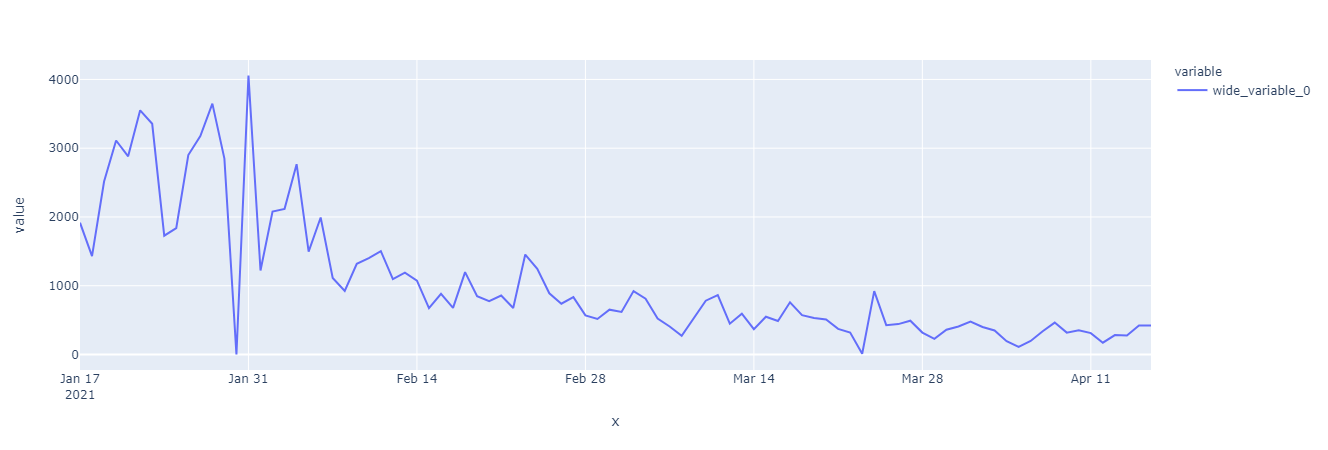

In [112]:
px.line(x=X_test_df.index, y = [X_test_df.new_case])

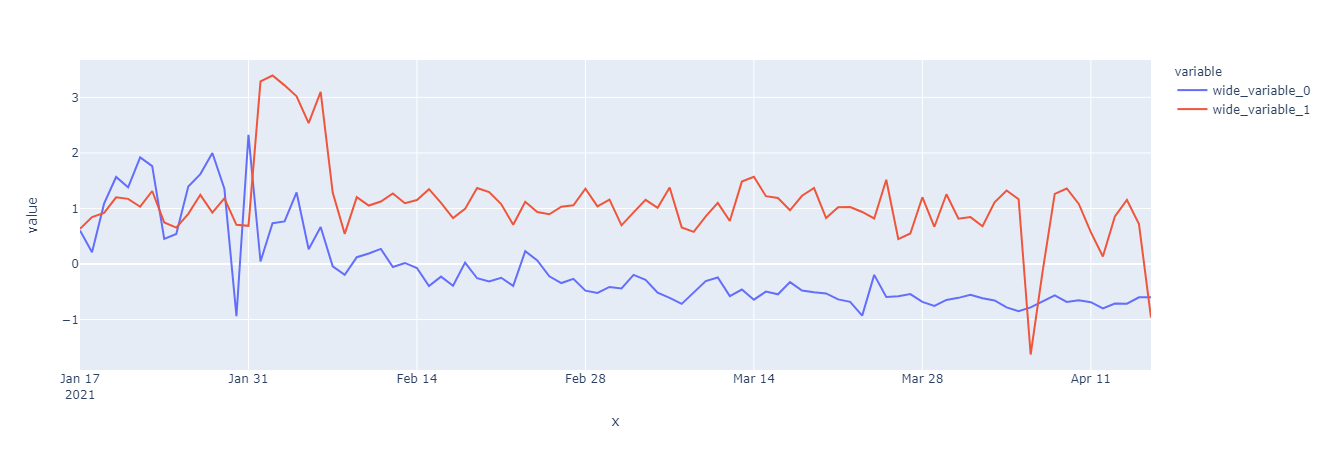

In [113]:
px.line(x=X_test_df.index, y = [test_norm[:, 0], y_pred])